# HW 2

In [1]:
# Intialization
library(faraway)

## Part A (Maximum 2 pages,40 points)

Using the sat dataset, fit a model with the total SAT score as the response and expend, salary, ratio and takers as predictors. Check the structure of the relationship between the predictors and the response (the process is to be performed for all predictors).Display plots that are relevant only. Suggest possible improvements or corrections to the model where appropriate.(Hints: You may use partial regression plot and partial residual plot)

In [2]:
data(sat)
head(sat)
summary(sat)

,expend,ratio,salary,takers,verbal,math,total
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Alabama,4.405,17.2,31.144,8,491,538,1029
Alaska,8.963,17.6,47.951,47,445,489,934
Arizona,4.778,19.3,32.175,27,448,496,944
Arkansas,4.459,17.1,28.934,6,482,523,1005
California,4.992,24.0,41.078,45,417,485,902
Colorado,5.443,18.4,34.571,29,462,518,980


     expend          ratio           salary          takers     
 Min.   :3.656   Min.   :13.80   Min.   :25.99   Min.   : 4.00  
 1st Qu.:4.882   1st Qu.:15.22   1st Qu.:30.98   1st Qu.: 9.00  
 Median :5.768   Median :16.60   Median :33.29   Median :28.00  
 Mean   :5.905   Mean   :16.86   Mean   :34.83   Mean   :35.24  
 3rd Qu.:6.434   3rd Qu.:17.57   3rd Qu.:38.55   3rd Qu.:63.00  
 Max.   :9.774   Max.   :24.30   Max.   :50.05   Max.   :81.00  
     verbal           math           total       
 Min.   :401.0   Min.   :443.0   Min.   : 844.0  
 1st Qu.:427.2   1st Qu.:474.8   1st Qu.: 897.2  
 Median :448.0   Median :497.5   Median : 945.5  
 Mean   :457.1   Mean   :508.8   Mean   : 965.9  
 3rd Qu.:490.2   3rd Qu.:539.5   3rd Qu.:1032.0  
 Max.   :516.0   Max.   :592.0   Max.   :1107.0  

In [3]:
model <- lm(total ~ expend + salary + ratio + takers, data = sat)
summary(model)


Call:
lm(formula = total ~ expend + salary + ratio + takers, data = sat)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.531 -20.855  -1.746  15.979  66.571 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1045.9715    52.8698  19.784  < 2e-16 ***
expend         4.4626    10.5465   0.423    0.674    
salary         1.6379     2.3872   0.686    0.496    
ratio         -3.6242     3.2154  -1.127    0.266    
takers        -2.9045     0.2313 -12.559 2.61e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32.7 on 45 degrees of freedom
Multiple R-squared:  0.8246,	Adjusted R-squared:  0.809 
F-statistic: 52.88 on 4 and 45 DF,  p-value: < 2.2e-16


The results of this regression indicate that the variables $expend$, $salary$, and $ratio$ are not statistically significant. The only significant variable is $takers$, which has a strong negative association with the state-by-state total $SAT$ score.

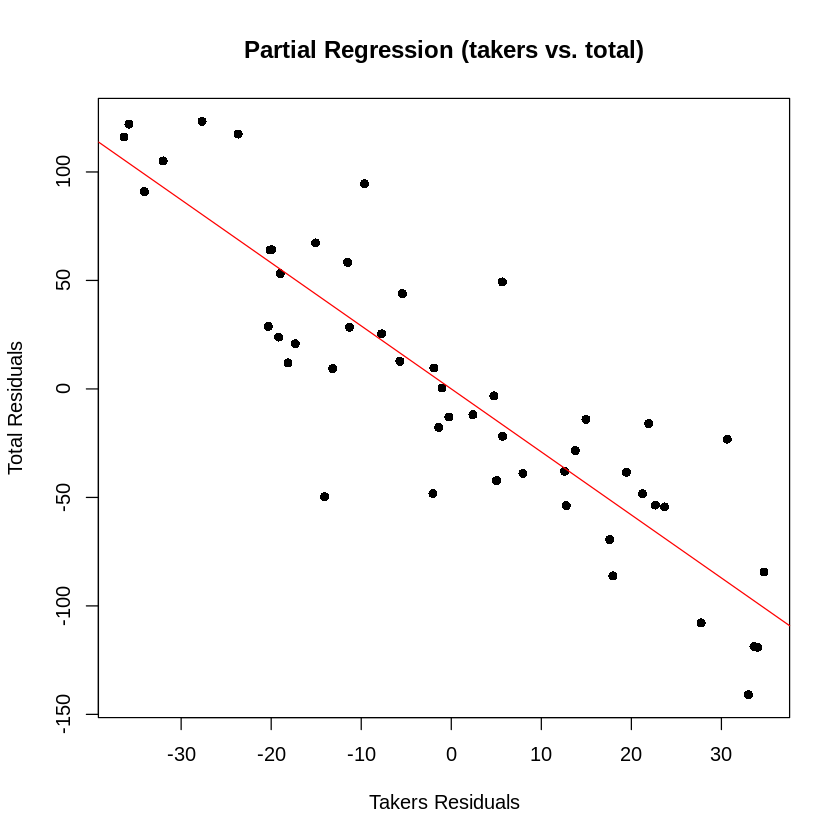

In [4]:
# partial regression plot
delta <- residuals(lm(total ~ expend + ratio + salary, sat))
gamma <- residuals(lm(takers ~ expend + ratio + salary, sat))
plot(gamma, delta, xlab = "Takers Residuals", ylab = "Total Residuals", main = "Partial Regression (takers vs. total)", pch = 16)
temp <- lm(delta ~ gamma)
abline(reg = temp, col = "red")

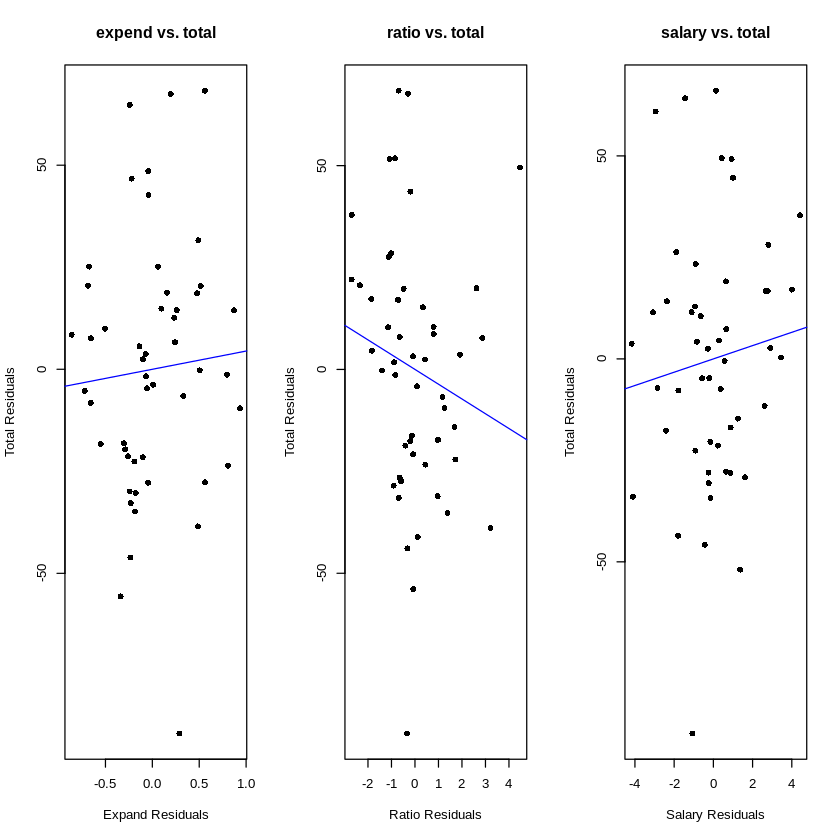

In [5]:
# partial regression plot
par(mfrow = c(1, 3))

delta <- residuals(lm(total ~ takers + ratio + salary, sat))
gamma <- residuals(lm(expend ~ takers + ratio + salary, sat))
plot(gamma, delta, xlab = "Expand Residuals", ylab = "Total Residuals", main = "expend vs. total", pch = 16)
temp <- lm(delta ~ gamma)
abline(reg = temp, col = "blue")

delta <- residuals(lm(total ~ takers + expend + salary, sat))
gamma <- residuals(lm(ratio ~ takers + expend + salary, sat))
plot(gamma, delta, xlab = "Ratio Residuals", ylab = "Total Residuals", main = "ratio vs. total", pch = 16)
temp <- lm(delta ~ gamma)
abline(reg = temp, col = "blue")

delta <- residuals(lm(total ~ takers + expend + ratio, sat))
gamma <- residuals(lm(salary ~ takers + expend + ratio, sat))
plot(gamma, delta, xlab = "Salary Residuals", ylab = "Total Residuals", main = "salary vs. total", pch = 16)
temp <- lm(delta ~ gamma)
abline(reg = temp, col = "blue")

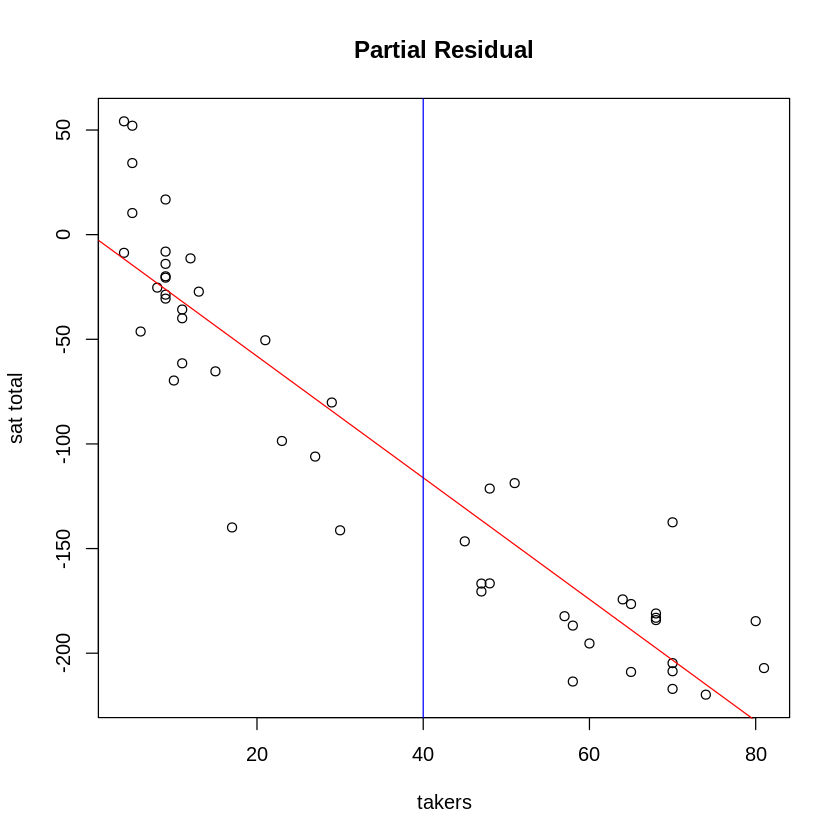

In [6]:
# partial residual plot
result <- lm(total ~ expend + ratio + salary + takers, sat)
plot(sat$takers, result$residuals + coef(result)[5] * sat$takers, xlab = "takers", ylab = "sat total", main = "Partial Residual")
abline(a = 0, b = coef(result)["takers"], col = "red")
abline(v = 40, col = "blue")

In [7]:
# two separate regressions on two groups
lm1 <- lm(total ~ expend + ratio + salary + takers, sat, subset = (takers < 40))
lm2 <- lm(total ~ expend + ratio + salary + takers, sat, subset = (takers > 40))
summary(lm1)
summary(lm2)


Call:
lm(formula = total ~ expend + ratio + salary + takers, data = sat, 
    subset = (takers < 40))

Residuals:
    Min      1Q  Median      3Q     Max 
-69.155 -16.672   1.747  15.654  54.956 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 993.7178    84.5010  11.760 5.86e-11 ***
expend        7.7581    16.4329   0.472    0.641    
ratio         1.4251     4.6111   0.309    0.760    
salary        1.0293     3.3058   0.311    0.758    
takers       -5.5242     0.8706  -6.345 2.19e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 30.95 on 22 degrees of freedom
Multiple R-squared:  0.656,	Adjusted R-squared:  0.5935 
F-statistic: 10.49 on 4 and 22 DF,  p-value: 6.549e-05



Call:
lm(formula = total ~ expend + ratio + salary + takers, data = sat, 
    subset = (takers > 40))

Residuals:
    Min      1Q  Median      3Q     Max 
-38.434 -15.938  -2.509  11.444  50.289 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 801.4329   105.6773   7.584  5.2e-07 ***
expend       11.1444    10.8359   1.028    0.317    
ratio         3.9147     4.8627   0.805    0.431    
salary       -0.6354     2.7190  -0.234    0.818    
takers       -0.3003     0.8869  -0.339    0.739    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 23.74 on 18 degrees of freedom
Multiple R-squared:  0.2627,	Adjusted R-squared:  0.09882 
F-statistic: 1.603 on 4 and 18 DF,  p-value: 0.2167


In the first regression on the subset with $takers<40$, we find no relation between the predictors and theresponse.In contrast, there is a strong relationship in the subset with $takers> 40$. Therefore, controlling the range of the predictor could be a feasible way to improvement.

## Part B (Maximum 3 pages, 60 points with 20 bonus points).

For the longley data, fit a model with Employed as the response and the other variables as predictors.

In [8]:
data(longley)
names(longley)

[1] "GNP.deflator" "GNP"          "Unemployed"   "Armed.Forces" "Population"  
[6] "Year"         "Employed"

Inspecting the names of the other variables, we can already conclude that there will be collinearity: It is reasonable to expect that $GNP.deflator$ and $Population$ are correlated with $GNP$. Moreover,inspecting the actual data we see that the population grows steadily over the years. Therefore, we can expect that variables $Year$ and $Population$ are (highly) correlated as well.

In [9]:
lm_fit <- lm(Employed ~ ., data = longley)
summary(lm_fit)


Call:
lm(formula = Employed ~ ., data = longley)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41011 -0.15767 -0.02816  0.10155  0.45539 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.482e+03  8.904e+02  -3.911 0.003560 ** 
GNP.deflator  1.506e-02  8.492e-02   0.177 0.863141    
GNP          -3.582e-02  3.349e-02  -1.070 0.312681    
Unemployed   -2.020e-02  4.884e-03  -4.136 0.002535 ** 
Armed.Forces -1.033e-02  2.143e-03  -4.822 0.000944 ***
Population   -5.110e-02  2.261e-01  -0.226 0.826212    
Year          1.829e+00  4.555e-01   4.016 0.003037 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3049 on 9 degrees of freedom
Multiple R-squared:  0.9955,	Adjusted R-squared:  0.9925 
F-statistic: 330.3 on 6 and 9 DF,  p-value: 4.984e-10


1. Compute and comment on the condition numbers. (20 points)

In [10]:
X <- model.matrix(lm_fit)[, -1] # '-1' because we discard the intercept
e <- eigen(t(X) %*% X)
round(sqrt(e$val[1] / e$val), 2)[length(e$val)]

[1] 5751.22

The condition number is large (much larger than the suggested critical value of about 30). Thus, the inner product of the design matrix $X'X$ is close to singular. Among others this reduces the accuracy of the estimated regression vector and associated standard errors.

2. Compute and comment on the correlations between the predictors.(20 points)

In [11]:
round(cor(X), 2)

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year
GNP.deflator,1.00,0.99,0.62,0.46,0.98,0.99
GNP,0.99,1.00,0.60,0.45,0.99,1.00
Unemployed,0.62,0.60,1.00,-0.18,0.69,0.67
Armed.Forces,0.46,0.45,-0.18,1.00,0.36,0.42
Population,0.98,0.99,0.69,0.36,1.00,0.99
Year,0.99,1.00,0.67,0.42,0.99,1.00


As predicted variables $GNP$, $GNP.deflator$, $Population$, and $Year$ are highly correlated which explains the high conditioning number.

3. Compute and comment on the variance inflation factors. (20 points)

In [12]:
round(vif(X), 2)

GNP.deflator          GNP   Unemployed Armed.Forces   Population         Year 
      135.53      1788.51        33.62         3.59       399.15       758.98

The variance inflation factors of GNP, GNP.deflator, Population, and Year are extremely large. For example, $\sqrt{VIF(GNP.deflator)} =\sqrt{135.53} = 11.64$ means that the standard error for the coefficient of GNP.deflator 11.64 times as large as it would be if GNP.deflator were uncorrelated with the other regressors.

4. Choose a reduced set of predictors that does not exhibit as much collinearity as the full set, fit a new linear model with this reduced set, and comment on the differences between the reduced model and the full model. (20 bonus points)

Since the variables $GNP$, $GNP.deflator$, $Population$, and $Year$ are all highly correlated, they all carry the same (amount of) information. Therefore, we can simply re t our linear model with just one of the four variables and the remaining two variables $Unemployed$ and $Armed.Forces$. I
decided to keep $Year$. 

In [13]:
lm_new <- lm(Employed~Year + Unemployed+Armed.Forces, data = longley)
summary(lm_new)


Call:
lm(formula = Employed ~ Year + Unemployed + Armed.Forces, data = longley)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57285 -0.11989  0.04087  0.13979  0.75303 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.797e+03  6.864e+01 -26.183 5.89e-12 ***
Year          9.564e-01  3.553e-02  26.921 4.24e-12 ***
Unemployed   -1.470e-02  1.671e-03  -8.793 1.41e-06 ***
Armed.Forces -7.723e-03  1.837e-03  -4.204  0.00122 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3321 on 12 degrees of freedom
Multiple R-squared:  0.9928,	Adjusted R-squared:  0.9911 
F-statistic: 555.2 on 3 and 12 DF,  p-value: 3.916e-13


In [14]:
X_new <- model.matrix(lm_new)[, -1]
e_new <- eigen(t(X_new) %*% X_new)
round(sqrt(e_new$val[1] / e_new$val), 2)[length(e_new$val)]

[1] 31.39

In [15]:
round(cor(X_new), 2)

,Year,Unemployed,Armed.Forces
Year,1.00,0.67,0.42
Unemployed,0.67,1.00,-0.18
Armed.Forces,0.42,-0.18,1.00


In [16]:
round(vif(X_new), 2)

Year   Unemployed Armed.Forces 
        3.89         3.32         2.22

The largest VIF is 3.89.Based on the data, there is no VIF that suggest multicollinearity since all of them are less than 5.

In [17]:
anova(lm_fit, lm_new)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,0.8364241,NA,NA,NA,NA
2,12,1.3233607,-3,-0.4869367,1.746495,0.2270322


$H_0$: GNP.deflator = GNP = population = 0 \
Test statistic : $F$ = 1.746495\
$F$ distribution : 12 degrees of freedom in the numerator and 9 degrees of freedom in the denominator.\
$p$-value : 0.2270322\
Decision : Fail to Reject $H_0$ at $\alpha=0.01$